# ***TensorFlow Regression***

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
import tensorflow as tf

In [0]:
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
noise

array([ 0.84172876,  0.10961412, -0.24122069, ...,  0.17838152,
        1.35081156,  1.23988734])

y = mx + b

b = 5

In [0]:
y_true=(0.5*x_data) + 5 + noise

In [0]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [0]:
y_df.head()

,Y
0,5.841729
1,5.109619
2,4.758789
3,5.290685
4,4.440650


In [0]:
my_data=pd.concat([x_df,y_df],axis=1)

In [0]:
my_data.head()

,X Data,Y
0,0.00000,5.841729
1,0.00001,5.109619
2,0.00002,4.758789
3,0.00003,5.290685
4,0.00004,4.440650


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


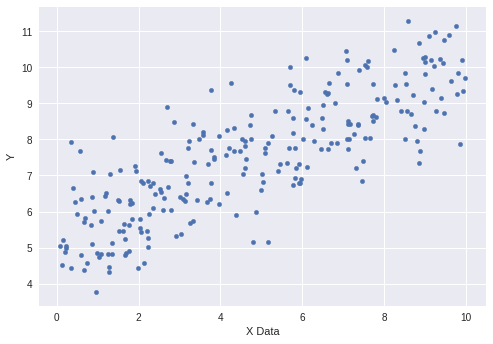

In [0]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.show()

In [0]:
batch_size=8

In [0]:
np.random.randn(2)

array([-0.10894776, -0.8981065 ])

In [0]:
m=tf.Variable(0.96)
b=tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model=m*xph+b

In [0]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as session:
  session.run(init)
  batches=10000
  
  for i in range(batches):
    rand_indx=np.random.randint(len(x_data),size=batch_size)
    feed={xph:x_data[rand_indx],yph:y_true[rand_indx]}
    session.run(train,feed_dict=feed)
  
  model_m,model_b=session.run([m,b])

In [0]:
model_m

0.51711446

In [0]:
model_b

5.035346

In [0]:
y_hat = model_m*x_data + model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


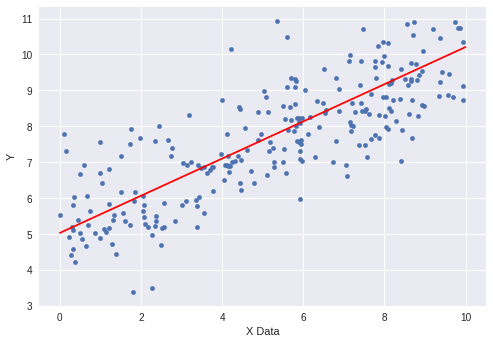

In [0]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


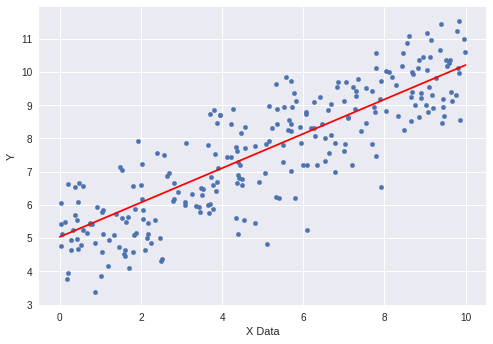

In [0]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')
plt.show()

# ***TF ESTIMATOR***

In [0]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3k5nfcu4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa5dfeb4940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,
                                              random_state=101)

In [0]:
print(x_train.shape)

(700000,)


In [0]:
print(x_eval.shape)

(300000,)


In [0]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                             batch_size=8,num_epochs=None,shuffle=True)

In [0]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                             batch_size=8,num_epochs=1000,shuffle=False)

In [0]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,
                                             batch_size=8,num_epochs=None,shuffle=True)

In [0]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3k5nfcu4/model.ckpt.
INFO:tensorflow:loss = 603.6891, step = 1
INFO:tensorflow:global_step/sec: 875.09
INFO:tensorflow:loss = 27.827608, step = 101 (0.116 sec)
INFO:tensorflow:global_step/sec: 961.161
INFO:tensorflow:loss = 16.35986, step = 201 (0.107 sec)
INFO:tensorflow:global_step/sec: 923.113
INFO:tensorflow:loss = 13.345358, step = 301 (0.109 sec)
INFO:tensorflow:global_step/sec: 958.067
INFO:tensorflow:

In [0]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-18T04:24:10Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp3k5nfcu4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-18-04:24:11
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0907589, global_step = 1000, label/mean = 7.512185, loss = 8.726071, predictio

In [0]:
eval_metrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-18T04:24:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3k5nfcu4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-18-04:24:12
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1153091, global_step = 1000, label/mean = 7.5278783, loss = 8.922473, prediction/mean = 7.301423
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [0]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0907589, 'label/mean': 7.512185, 'loss': 8.726071, 'prediction/mean': 7.2860026, 'global_step': 1000}


In [0]:
print('Eval Metrics')
print(eval_metrics)

Eval Metrics
{'average_loss': 1.1153091, 'label/mean': 7.5278783, 'loss': 8.922473, 'prediction/mean': 7.301423, 'global_step': 1000}


In [0]:
brand_new_data=np.linspace(0,10,10)

In [0]:
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [0]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3k5nfcu4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.341586], dtype=float32)},
 {'predictions': array([4.9956064], dtype=float32)},
 {'predictions': array([5.6496263], dtype=float32)},
 {'predictions': array([6.3036466], dtype=float32)},
 {'predictions': array([6.9576664], dtype=float32)},
 {'predictions': array([7.6116867], dtype=float32)},
 {'predictions': array([8.265707], dtype=float32)},
 {'predictions': array([8.919727], dtype=float32)},
 {'predictions': array([9.573748], dtype=float32)},
 {'predictions': array([10.227767], dtype=float32)}]

In [0]:
predictions=[]

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3k5nfcu4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
predictions

[array([4.341586], dtype=float32),
 array([4.9956064], dtype=float32),
 array([5.6496263], dtype=float32),
 array([6.3036466], dtype=float32),
 array([6.9576664], dtype=float32),
 array([7.6116867], dtype=float32),
 array([8.265707], dtype=float32),
 array([8.919727], dtype=float32),
 array([9.573748], dtype=float32),
 array([10.227767], dtype=float32)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


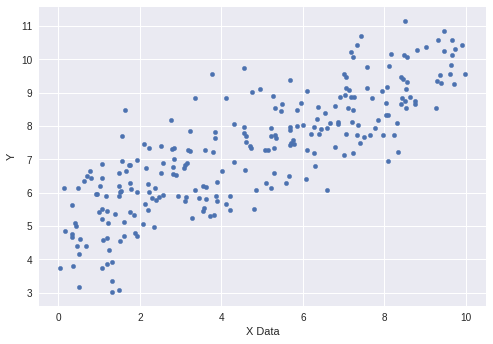

In [0]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


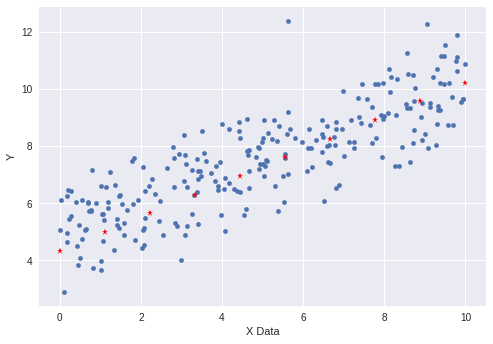

In [0]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')
plt.show()